<a href="https://colab.research.google.com/github/rishulu/Hexart.In---AI-Center/blob/main/Stock_Price_Prediction_with_LSTM_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Loading the data
from google.colab import files
uploaded=files.upload()

Saving stock.csv to stock.csv


In [ ]:
import pandas as pd
df=pd.read_csv("stock.csv")
df.head(),df.tail()

(         Date       Open       High        Low      Close  Adj Close    Volume
 0  2004-08-19  49.813290  51.835709  47.800831  49.982655  49.982655  44871361
 1  2004-08-20  50.316402  54.336334  50.062355  53.952770  53.952770  22942874
 2  2004-08-23  55.168217  56.528118  54.321388  54.495735  54.495735  18342897
 3  2004-08-24  55.412300  55.591629  51.591621  52.239197  52.239197  15319808
 4  2004-08-25  52.284027  53.798351  51.746044  52.802086  52.802086   9232276,
             Date         Open         High          Low        Close  \
 4139  2021-01-28  1843.939941  1898.829956  1842.640015  1863.109985   
 4140  2021-01-29  1846.170044  1857.280029  1810.199951  1835.739990   
 4141  2021-02-01  1853.569946  1922.391968  1850.930054  1901.349976   
 4142  2021-02-02  1922.560059  1955.760010  1914.489990  1927.510010   
 4143  2021-02-03  2073.000000  2116.500000  2018.380005  2070.070068   
 
         Adj Close   Volume  
 4139  1863.109985  1773100  
 4140  1835.739990 

In [ ]:
df1=df.reset_index()['Close']
df1

0         49.982655
1         53.952770
2         54.495735
3         52.239197
4         52.802086
           ...     
4139    1863.109985
4140    1835.739990
4141    1901.349976
4142    1927.510010
4143    2070.070068
Name: Close, Length: 4144, dtype: float64

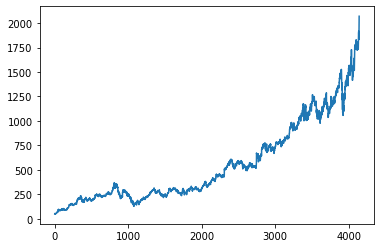

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [ ]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [ ]:
import numpy as np

In [ ]:

df1

0         49.982655
1         53.952770
2         54.495735
3         52.239197
4         52.802086
           ...     
4139    1863.109985
4140    1835.739990
4141    1901.349976
4142    1927.510010
4143    2070.070068
Name: Close, Length: 4144, dtype: float64

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [ ]:
print(df1)

[[8.13695600e-05]
 [2.04652806e-03]
 [2.31528911e-03]
 ...
 [9.16485612e-01]
 [9.29434510e-01]
 [1.00000000e+00]]


In [ ]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [ ]:
training_size,test_size

(2693, 1451)

In [ ]:
train_data

array([[8.13695600e-05],
       [2.04652806e-03],
       [2.31528911e-03],
       ...,
       [2.49405408e-01],
       [2.47128476e-01],
       [2.41317324e-01]])

In [ ]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
print(X_train.shape), print(y_train.shape)

(2592, 100)
(2592,)


(None, None)

In [ ]:
print(X_test.shape), print(ytest.shape)

(1350, 100)
(1350,)


(None, None)

In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
41/41 [==============================] - 16s 237ms/step - loss: 0.0015 - val_loss: 7.3138e-04
Epoch 2/100
41/41 [==============================] - 8s 206ms/step - loss: 7.8354e-05 - val_loss: 6.8203e-04
Epoch 3/100
41/41 [==============================] - 8s 206ms/step - loss: 6.1839e-05 - val_loss: 6.9941e-04
Epoch 4/100
41/41 [==============================] - 8s 204ms/step - loss: 6.0264e-05 - val_loss: 8.4371e-04
Epoch 5/100
41/41 [==============================] - 8s 206ms/step - loss: 6.0371e-05 - val_loss: 7.7670e-04
Epoch 6/100
41/41 [==============================] - 9s 209ms/step - loss: 5.7468e-05 - val_loss: 6.3582e-04
Epoch 7/100
41/41 [==============================] - 9s 210ms/step - loss: 5.4319e-05 - val_loss: 7.0236e-04
Epoch 8/100
41/41 [==============================] - 8s 206ms/step - loss: 5.2642e-05 - val_loss: 0.0013
Epoch 9/100
41/41 [==============================] - 8s 206ms/step - loss: 5.1666e-05 - val_loss: 7.8697e-04
Epoch 10/100
41/41 [======

In [22]:
import tensorflow as tf

In [23]:
tf.__version__

'2.9.2'

In [24]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

43/43 [==============================] - 6s 76ms/step


In [25]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [26]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

331.6795863830444

In [27]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

1118.6980260636635

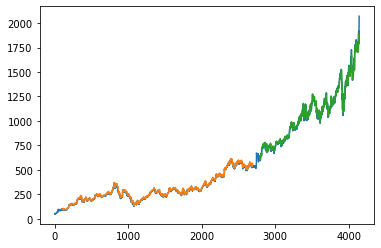

In [28]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [29]:
len(test_data)

1451

In [30]:
x_input=test_data[1351:].reshape(1,-1)
x_input.shape

(1, 100)

In [31]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [32]:
temp_input

[0.7280784024050864,
 0.727365648678051,
 0.7383345348337272,
 0.728167526443981,
 0.7156096883566693,
 0.6980178025333278,
 0.6837473259521413,
 0.7007253714611219,
 0.6758522343600932,
 0.6823267134324543,
 0.6905781214995081,
 0.700260112130577,
 0.7026409717838143,
 0.7027746283903819,
 0.7129169235240875,
 0.6972406984119505,
 0.7109023498951963,
 0.6947756081692392,
 0.6981663231286318,
 0.710857817822511,
 0.7253559694885559,
 0.7520506879389985,
 0.7533030219302367,
 0.751521017330612,
 0.7470909007481147,
 0.7539613339287707,
 0.7349537899186627,
 0.7455069640328993,
 0.7640096105841856,
 0.7749091910226241,
 0.7876155497052397,
 0.762593892008907,
 0.769429702772694,
 0.7260489642924709,
 0.7511052444056726,
 0.777720748473037,
 0.780205596648893,
 0.7921743680663965,
 0.8411385833191685,
 0.8481872046840895,
 0.8473853269181595,
 0.8480040616719164,
 0.836812394870778,
 0.842910617874465,
 0.8414900053547781,
 0.8549438005698102,
 0.8571019399660973,
 0.8515432363431134,
 0.

In [33]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.9554849]
101
1 day input [0.72736565 0.73833453 0.72816753 0.71560969 0.6980178  0.68374733
 0.70072537 0.67585223 0.68232671 0.69057812 0.70026011 0.70264097
 0.70277463 0.71291692 0.6972407  0.71090235 0.69477561 0.69816632
 0.71085782 0.72535597 0.75205069 0.75330302 0.75152102 0.7470909
 0.75396133 0.73495379 0.74550696 0.76400961 0.77490919 0.78761555
 0.76259389 0.7694297  0.72604896 0.75110524 0.77772075 0.7802056
 0.79217437 0.84113858 0.8481872  0.84738533 0.84800406 0.83681239
 0.84291062 0.84149001 0.8549438  0.85710194 0.85154324 0.83997537
 0.84845947 0.83770334 0.8340751  0.85091459 0.85217684 0.86294771
 0.84688538 0.86537812 0.8801535  0.87956944 0.88017331 0.87596096
 0.87550066 0.85846316 0.85410724 0.85729499 0.84654883 0.85036516
 0.84800406 0.84052976 0.83216941 0.8363075  0.82845204 0.83284754
 0.83605009 0.85448344 0.8458855  0.83638176 0.8424998  0.83079828
 0.83707475 0.83428797 0.86000752 0.86988745 0.8498454  0.83986154
 0.84374718 0.83670847 0.83473341 0.

In [34]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [35]:
import matplotlib.pyplot as plt

In [36]:
len(df1)

4144

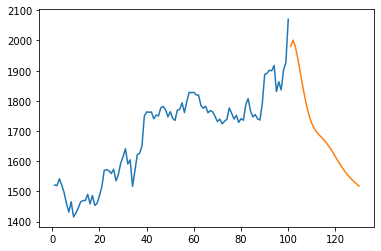

In [37]:
plt.plot(day_new,scaler.inverse_transform(df1[4044:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

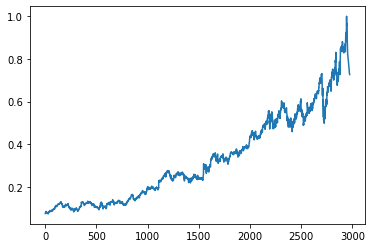

In [38]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [39]:
df3=scaler.inverse_transform(df3).tolist()

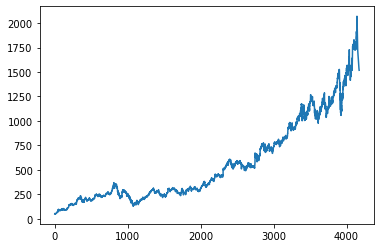

In [40]:
plt.plot(df3)